In [2]:
import pandas as pd
import numpy as np
commande_par_mois = pd.ExcelFile('D:/fda/Commandes toner drop/commandes_by_month.xlsx')
commandes = commande_par_mois.parse()
all_ref=commandes.groupby('reference')['reference'].count().index
ref_12=commandes.groupby('reference')['reference'].count().index[(commandes.groupby('reference')['reference'].count()>12).values]

In [3]:
commandes = commande_par_mois.parse()

In [4]:
commandes.head()

,reference,date,quantites
0,6AG00002332,2009/01,9
1,6BC02231432,2009/01,123
2,21204095,2009/01,19
3,6AJ00000041,2009/01,743
4,6AJ00000049,2009/01,92


In [5]:
df1=commandes[commandes['reference']=='6AJ00000047']
df2=commandes[commandes['reference']=='6AJ00000075']
df3=commandes[commandes['reference']=='6AJ00000114']
df4=commandes[commandes['reference']=='6AJ00000139']
commandes1=pd.Series(df1['quantites'].values,pd.to_datetime(df1['date']))
commandes1=commandes1.sort_index()
commandes2=pd.Series(df2['quantites'].values,pd.to_datetime(df2['date']))
commandes2=commandes2.sort_index()
commandes3=pd.Series(df3['quantites'].values,pd.to_datetime(df3['date']))
commandes3=commandes3.sort_index()
commandes4=pd.Series(df4['quantites'].values,pd.to_datetime(df4['date']))
commandes4=commandes4.sort_index()

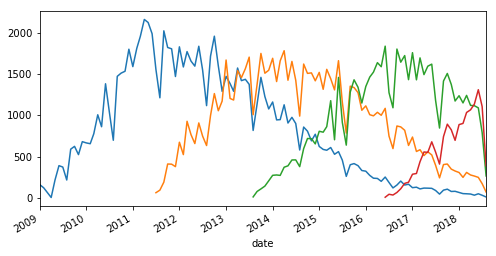

In [6]:
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
commandes1.plot(figsize=(8,4))
commandes2.plot()
commandes3.plot()
commandes4.plot()
plt.show()


In [7]:
import pandas as pd
commande_Weiss_H = pd.read_csv('D:/Documents/Order_cust/comm_Weiss_H.txt')
commande_Weiss_2 = pd.read_csv('D:/Documents/Order_cust/comm_weiss2.txt')
commande_Mash_28 = pd.read_csv('D:/Documents/Order_cust/commandes_Mash_28.txt')
commande_Mash_25 = pd.read_csv('D:/Documents/Order_cust/commandes_ex_mash_25.txt')


In [8]:
commande_Weiss_H=pd.Series(commande_Weiss_H['QUANTITE'].values,pd.to_datetime(commande_Weiss_H['DATE_COMM']))
commandes3_p=commande_Weiss_H.sort_index()
commande_Weiss_2=pd.Series(commande_Weiss_2['QUANTITE'].values,pd.to_datetime(commande_Weiss_2['DATE_COMM']))
commandes4_p=commande_Weiss_2.sort_index()
commande_Mash_28=pd.Series(commande_Mash_28['QUANTITE'].values,pd.to_datetime(commande_Mash_28['DATE_COMM']))
commandes1_p=commande_Mash_28.sort_index()
commande_Mash_25=pd.Series(commande_Mash_25['QUANTITE'].values,pd.to_datetime(commande_Mash_25['DATE_COMM']))
commandes2_p=commande_Mash_25.sort_index()

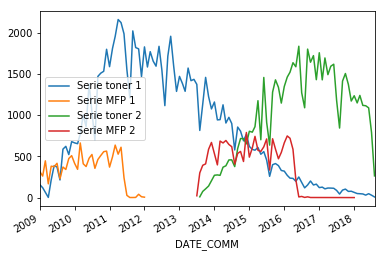

In [12]:
import matplotlib.pyplot as plt
commandes1.plot(label='Serie toner 1')
commandes1_p.plot(label='Serie MFP 1')
# commandes2.plot()
# commandes2_p.plot()
commandes3.plot(label='Serie toner 2')
commandes3_p.plot(label='Serie MFP 2')
# commandes4.plot()
# commandes4_p.plot()
plt.legend()
plt.show()

In [97]:
t0=27
df2=commandes[commandes['reference']=='6AJ00000075']
commandes_b=pd.Series(df2['quantites'].values,pd.to_datetime(df2['date']))
commandes_b=commandes_b.sort_index()
T=len(commandes_b)
first_col=np.vstack([np.arange(t0).reshape(-1,1),t0*np.ones(T-t0).reshape(-1,1)])
second_col=np.vstack([np.zeros(t0).reshape(-1,1),(np.arange(t0,T)-t0).reshape(-1,1)])
X_2=np.hstack([first_col,second_col,np.vstack([np.concatenate(([np.eye(12) for i in range(T//12)])),np.eye(12)[:T%12,:]])])
alpha_2=np.linalg.solve(np.dot(X_2.T,X_2),np.dot(X_2.T,Y))
Y=commandes_b.values
res=Y-np.dot(X_2,alpha_2)
SCT=np.sum((Y-np.mean(Y))**2)
SCE=np.sum(res**2)
R2_2=1-SCE/SCT

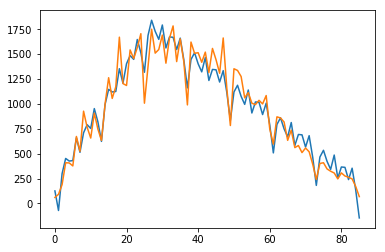

In [106]:
plt.plot(np.dot(X_2,alpha_2))
plt.plot(Y)
plt.show()

In [13]:
t0=30
df2=commandes[commandes['reference']=='6AJ00000047']
commandes_b=pd.Series(df2['quantites'].values,pd.to_datetime(df2['date']))
commandes_b=commandes_b.sort_index()
T=len(commandes_b)
T2=round(0.8*T)
Y1=commandes_b.values[:T2]
Y2=commandes_b.values[T2:]
first_col=np.vstack([np.arange(t0).reshape(-1,1),t0*np.ones(T-t0).reshape(-1,1)])
second_col=np.vstack([np.zeros(t0).reshape(-1,1),(np.arange(t0,T)-t0).reshape(-1,1)])
X=np.hstack([first_col,second_col,np.vstack([np.concatenate(([np.eye(12) for i in range(T//12)])),np.eye(12)[:T%12,:]])])
X_11=X[:T2,:]
X_21=X[T2:,:]
alpha_2=np.linalg.solve(np.dot(X_11.T,X_11),np.dot(X_11.T,Y1))
res=Y1-np.dot(X_11,alpha_2)
SCT=np.sum((Y1-np.mean(Y1))**2)
SCE=np.sum(res**2)
R2_2=1-SCE/SCT

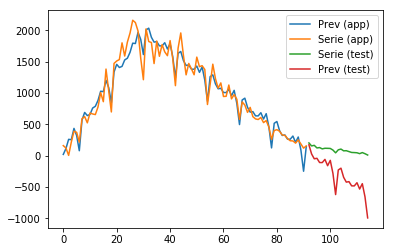

In [19]:
plt.plot(np.dot(X_11,alpha_2),label='Prev (app)')
plt.plot(Y1,label='Serie (app)')
plt.plot(range(T2,T),Y2,label='Serie (test)')
plt.plot(range(T2,T),np.dot(X_21,alpha_2),label='Prev (test)')
plt.legend()
plt.show()

In [10]:
t0=35
df2=commandes[commandes['reference']=='6AJ00000114']
commandes_b=pd.Series(df2['quantites'].values,pd.to_datetime(df2['date']))
commandes_b=commandes_b.sort_index()
T=len(commandes_b)
first_col=np.vstack([np.arange(t0).reshape(-1,1),t0*np.ones(T-t0).reshape(-1,1)])
second_col=np.vstack([np.zeros(t0).reshape(-1,1),(np.arange(t0,T)-t0).reshape(-1,1)])
X_2=np.hstack([first_col,second_col,np.vstack([np.concatenate(([np.eye(12) for i in range(T//12)])),np.eye(12)[:T%12,:]])])
Y=commandes_b.values
alpha_2=np.linalg.solve(np.dot(X_2.T,X_2),np.dot(X_2.T,Y))
res=Y-np.dot(X_2,alpha_2)
SCT=np.sum((Y-np.mean(Y))**2)
SCE=np.sum(res**2)
R2_2=1-SCE/SCT

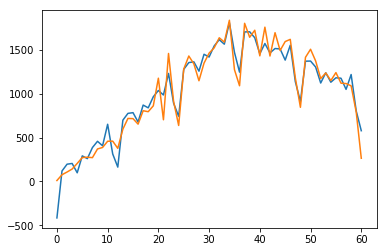

In [11]:
plt.plot(np.dot(X_2,alpha_2))
plt.plot(Y)
plt.show()

In [12]:
ref_12

Index(['099060065', '21203945', '21204094', '21204095', '21204099', '21204100',
       '22569345', '22569346', '44472206', '44472609',
       ...
       '6BT43865731', '6BT43865732', '6BTBANN105M', '6BTBANN165M',
       '6BTBANN180G', '6BTEOF001BU', '6LK12907000', '6LK12908200',
       '6LK12912100', '6LK20902000'],
      dtype='object', name='reference', length=222)

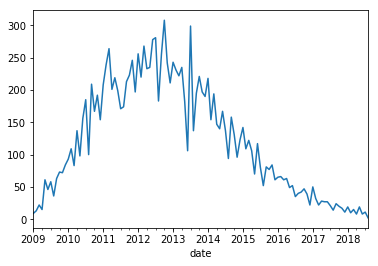

In [18]:
df2=commandes[commandes['reference']=='6B000000192']
commandes_b=pd.Series(df2['quantites'].values,pd.to_datetime(df2['date']))
commandes_b=commandes_b.sort_index()
commandes_b.plot()
plt.show()

In [23]:
t0=27
df2=commandes[commandes['reference']=='6B000000192']
commandes_b=pd.Series(df2['quantites'].values,pd.to_datetime(df2['date']))
commandes_b=commandes_b.sort_index()
T=len(commandes_b)
first_col=np.vstack([np.arange(t0).reshape(-1,1),t0*np.ones(T-t0).reshape(-1,1)])
second_col=np.vstack([np.zeros(t0).reshape(-1,1),(np.arange(t0,T)-t0).reshape(-1,1)])
X_2=np.hstack([first_col,second_col,np.vstack([np.concatenate(([np.eye(12) for i in range(T//12)])),np.eye(12)[:T%12,:]])])
Y=commandes_b.values
alpha_2=np.linalg.solve(np.dot(X_2.T,X_2),np.dot(X_2.T,Y))
res=Y-np.dot(X_2,alpha_2)
SCT=np.sum((Y-np.mean(Y))**2)
SCE=np.sum(res**2)
R2_2=1-SCE/SCT

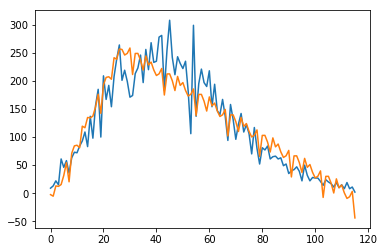

In [26]:
plt.plot(Y)
plt.plot(np.dot(X_2,alpha_2))
plt.show()